<img src="info/SchoolOfAI_MTY_Logo2.png" ,width=700,height=100 >

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re as re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load House prices dataset
train = pd.read_csv('home_data.csv', header = 0)
#train = pd.read_csv('TitanicDataSet.csv', header = 0, dtype={'Age': np.float64})

# Data Description

In [3]:
train.shape

(21613, 21)

There are **21613** observations or **hauses** and **21** columns or **attributes** in the Titanic dataset

In [4]:
train.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Dataset Attributes:**
- id
- date
- price
- ...

In [5]:
# Verify the column 'price'
train['price'].describe()
#train.drop(['Fare'], axis=1).hist(edgecolor='black', linewidth=1.9,figsize=(15,7));

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

We can see the average proce for this dataset is 540,000 USD and the max price is 7.7MUSD!

In [6]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


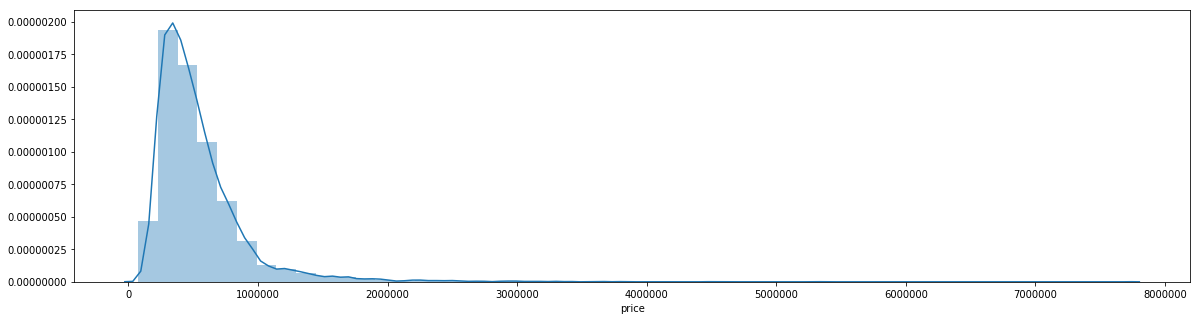

In [7]:
plt.subplots(figsize=(20, 5))
sb.distplot(train['price'])

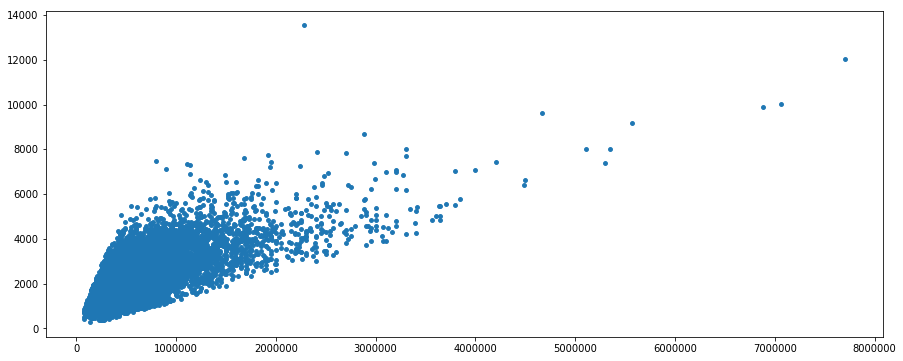

In [8]:
plt.subplots(figsize=(15, 6))
feature = 'sqft_living'
'''
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=feature, y='price', ylim=(0,6000000), s=10);'''

plt.scatter(train['price'], train[feature], s=15);

Most of the density lies between 200k and 700k, but there appears to be a lot of outliers as seen abive. These are points that lie far from the line and from the data distribution. Will this “confuse” our model? Let's move forward.

## Correlation Features

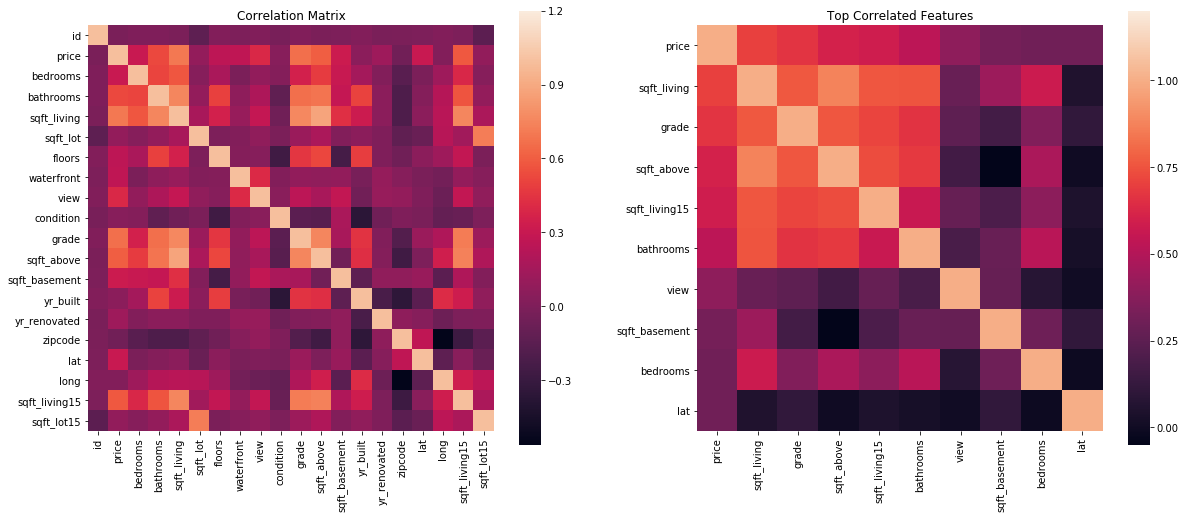

In [9]:
corrmat = train.corr()
#plt.imshow(corrmat)
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.subplot(121)
plt.title('Correlation Matrix')
sb.heatmap(corrmat, vmax=1.2, square=True);

plt.subplot(122)
k = 10 # Top correlated features
plt.title('Top Correlated Features')
cols = corrmat.nlargest(k, 'price')['price'].index
sb.heatmap(train[cols].corr(), vmax=1.2, square=True);

A high correlation means a strong relation between variables, for instance, the price has a strong relation with features sqft_living, grade, sqft_above. Each element on the principal diagonal of a correlation matrix is the correlation of a random variable with itself, no relevance for our task.

## Verify for Missing Data

In [10]:
# Compare total features against missing cells for each column
#  train.isnull().count() Number of non-NAN values
total_info = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
miss_info = pd.concat([total_info, percent], axis=1, keys=['Total', 'Percent'])
miss_info.T

,sqft_lot15,view,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,id
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No missing data, that's awesome!

# Building a LINEAR Classifier for Predicting House Prices

## What is regression?

Linear regression attempts to model the relationship between a dependent CONTINOUS variable Y and one or more explanatory (independent) variables X, also called predictors, by fitting a linear equation to the data, i.e., a straight line. 

It’s main use is to predict or forecast values within a continuous range (e.g. sales, price, stock) rather than trying to classify them into categories (e.g. cat, dog, survived, dead).

A linear regression model is based on a traditional slope-intercept form, where $m$ and $b$ are the linear coefficients that we calculate in order to produce the most accurate predictions for unseen observations.

We can represent this as the following equation:

$$Y = mX + b$$

where:

$m$ represents the slope of the line, $b$ is the intercept, $X$ represents our input datapoints and $Y$ is our prediction.

The final prediction model will look like this:

<img src="info/linear_regression_output.png" ,width=600,height=300 >

The most common method for fitting a regression line is through the least-squares approach. In this case we implement the Mean Squared Error (MSE). This method consists of minimising the the sum of squares of the vertical deviation between observations and the predicted line, the residuals.

MSE, our cost function, is computed as:

$$MSE =  \frac{1}{n} \sum_{i=1}^{n} (Y_{(i)} - Y'_{(i)})^2$$

where:

$n$ represents the number of observations, $Y$ are the observed (real) values of the variables being predicted and $Y'$ are the predictions from the model.

<img src="info/mse_plot.png" ,width=600,height=300 >

The lower the MSE value is, means the model is perfoming "bette" on the training set.

#  Let’s implement Linear Regression in Python for Predicting House Prices!

In [11]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

/Users/daniel.reyna/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# define variables, predictors and dependent
predictor = 'grade'
X = np.array(train[predictor]).reshape(-1, 1)
y = train['price']

# split data into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X[0:], y[0:], test_size = 0.20, random_state=10)

# training model
lr_model = LinearRegression(fit_intercept=True, normalize=True) # is the regularisation hyperparameter
lr_model.fit(X_train,y_train.ravel())
predict = lr_model.predict(X_test)

# results
print('The model performance for testing set: ')
print('-----------------------------------------')

# the coefficients
print('Coefficients: \n', lr_model.coef_)
print('Intercept: ', lr_model.intercept_ )

# the mean squared error
print("MSE - Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, predict))

# explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, predict))

The model performance for testing set: 
-----------------------------------------
Coefficients: 
 [208897.0483455]
Intercept:  -1060845.6825735928
MSE - Mean squared error: 86457216824.98
Variance score: 0.41


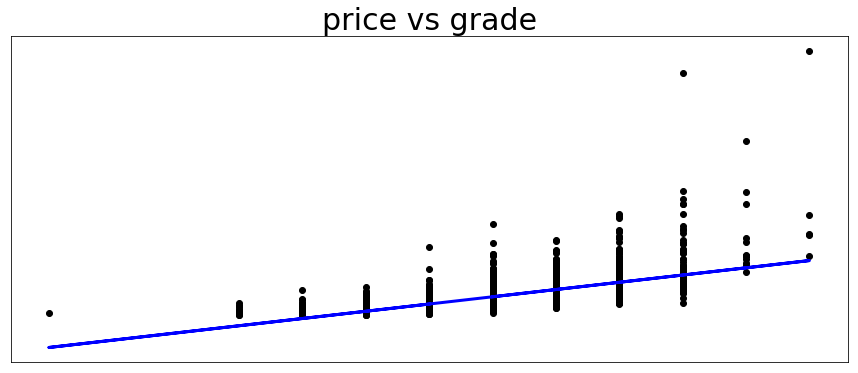

In [13]:
# Plot outputs
plt.subplots(figsize=(15, 6))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predict, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('price vs '+ predictor, fontsize=30)
plt.show()

In [14]:
# define variables, predictors and dependent
predictor = 'sqft_living'
X = np.array(train[predictor]).reshape(-1, 1)
y = train['price']

# split data into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X[0:], y[0:], test_size = 0.20, random_state=10)

# training model
lr_model = LinearRegression(fit_intercept=True, normalize=True) # is the regularisation hyperparameter
lr_model.fit(X_train,y_train.ravel())
predict = lr_model.predict(X_test)

# results
print('The model performance for testing set: ')
print('-----------------------------------------')

# the coefficients
print('Coefficients: \n', lr_model.coef_)
print('Intercept: ', lr_model.intercept_ )

# the mean squared error
print("MSE - Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, predict))

# explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, predict))

The model performance for testing set: 
-----------------------------------------
Coefficients: 
 [277.36412815]
Intercept:  -36738.174109773245
MSE - Mean squared error: 71973969207.29
Variance score: 0.51


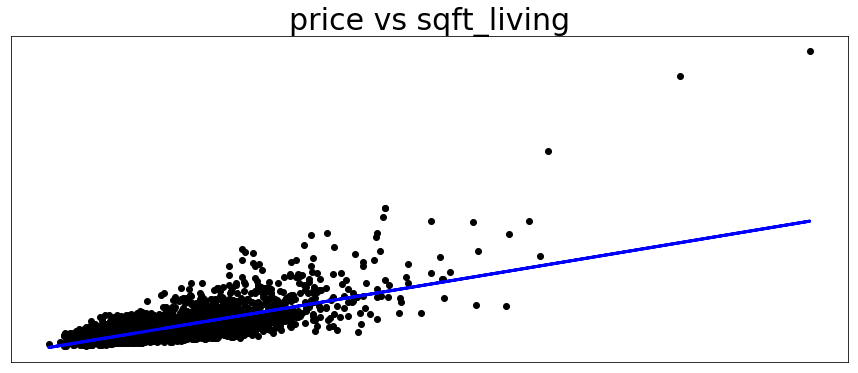

In [15]:
# Plot outputs
plt.subplots(figsize=(15, 6))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predict, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.title('price vs '+ predictor, fontsize=30)
plt.show()

A more accurate, not the best, estimator for house prices. Variance error augmented and MSE improved with respect to the feature grade.

#  Linear Regression ... Multivariable!

In [16]:
# define variables, predictors and dependent

#X = train.loc[:, train.columns != 'date']
X = train[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view']]
y = train['price']

# split data into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X[0:], y[0:], test_size = 0.20, random_state=10)

# training model
lr_model = LinearRegression(fit_intercept=True, normalize=True) # is the regularisation hyperparameter
lr_model.fit(X_train,y_train.ravel())
predict = lr_model.predict(X_test)

# results
print('The model performance for testing set: ')
print('-----------------------------------------')

# the coefficients
print('Coefficients: \n', lr_model.coef_)
print('Intercept: ', lr_model.intercept_ )

# the mean squared error
print("MSE - Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, predict))

# explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, predict))

The model performance for testing set: 
-----------------------------------------
Coefficients: 
 [ 1.97981662e+02  1.10341464e+05 -3.83446951e+01 -3.20756578e+04
  9.15610899e+04]
Intercept:  -602516.6748626498
MSE - Mean squared error: 63031168143.83
Variance score: 0.57


Keeps improving ...

In [17]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [18]:
# define variables, predictors and dependent

#X = train.loc[:, train.columns != 'date']
X = train[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view']]
y = train['price']

# split data into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X[0:], y[0:], test_size = 0.20, random_state=10)

# training model
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = True))
model.fit(X_train,y_train)
predict = model.predict(X_test)
# results
print('The model performance for testing set: ')
print('-----------------------------------------')

print('Coefficients: \n')
print(model.named_steps.linearregression.coef_)

# the mean squared error
print("MSE - Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, predict))

# explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, predict))

The model performance for testing set: 
-----------------------------------------
Coefficients: 

[ 0.00000000e+00 -2.69065202e+02 -1.02508629e+04  7.94194759e+01
 -9.94968586e+04 -8.40431338e+04 -8.34481756e-02  7.11297590e+01
  1.46106639e-01  6.42415941e+00 -7.45362189e+00  6.08756842e+02
 -2.78471652e+01  3.08946127e+03  4.10992787e+03 -7.04199742e-02
 -8.56694201e+00  2.49443082e+01  1.47833000e+04  4.11878589e+03
  2.68462659e+04]
MSE - Mean squared error: 51291148363.82
Variance score: 0.65


Better!